In [539]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix

In [540]:
data = pd.read_csv("hotel_booking.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

##Dimensionality reduction

In [541]:
print(data.groupby("hotel").size())
print(data.groupby("children").size())
print(data.groupby("meal").size())
print(data.groupby("reservation_status").size())
print(data.groupby("deposit_type").size())
print(data.groupby("market_segment").size())
print(data.groupby("distribution_channel").size())
print(data.groupby("reserved_room_type").size())
print(data.groupby("deposit_type").size())
print(data.groupby("customer_type").size())
print(data.groupby("reservation_status").size())


data.drop(["credit_card", "phone-number", "email", "name", "reservation_status_date", "company", "agent", "days_in_waiting_list", "required_car_parking_spaces", "assigned_room_type", "country"], axis=1, inplace = True)
data

hotel
City Hotel      79330
Resort Hotel    40060
dtype: int64
children
0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
dtype: int64
meal
BB           92310
FB             798
HB           14463
SC           10650
Undefined     1169
dtype: int64
reservation_status
Canceled     43017
Check-Out    75166
No-Show       1207
dtype: int64
deposit_type
No Deposit    104641
Non Refund     14587
Refundable       162
dtype: int64
market_segment
Aviation           237
Complementary      743
Corporate         5295
Direct           12606
Groups           19811
Offline TA/TO    24219
Online TA        56477
Undefined            2
dtype: int64
distribution_channel
Corporate     6677
Direct       14645
GDS            193
TA/TO        97870
Undefined        5
dtype: int64
reserved_room_type
A    85994
B     1118
C      932
D    19201
E     6535
F     2897
G     2094
H      601
L        6
P       12
dtype: int64
deposit_type
No Deposit    104641
Non Refund     14587
Refundable 

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,deposit_type,customer_type,adr,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,0,0,C,3,No Deposit,Transient,0.00,0,Check-Out
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,0,0,C,4,No Deposit,Transient,0.00,0,Check-Out
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,0,0,A,0,No Deposit,Transient,75.00,0,Check-Out
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,0,0,A,0,No Deposit,Transient,75.00,0,Check-Out
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,0,0,A,0,No Deposit,Transient,98.00,1,Check-Out
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,0,0,0,A,0,No Deposit,Transient,96.14,0,Check-Out
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,0,0,0,E,0,No Deposit,Transient,225.43,2,Check-Out
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,0,0,0,D,0,No Deposit,Transient,157.71,4,Check-Out
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,0,0,0,A,0,No Deposit,Transient,104.40,0,Check-Out


##Vectorisatie van object features

###Dummy variable toekennen

In [542]:
data['arrival_date_month'] = pd.to_datetime(data.arrival_date_month, format='%B').dt.month

data.loc[data['meal'] == "BB", 'meal'] = 0
data.loc[data['meal'] == "FB", 'meal'] = 1
data.loc[data['meal'] == "HB", 'meal'] = 2
data.loc[data['meal'] == "SC", 'meal'] = 3
data.loc[data['meal'] == "Undefined", 'meal'] = 4

data.loc[data['hotel'] == "Resort Hotel", "hotel"] = 0
data.loc[data['hotel'] == "City Hotel", "hotel"] = 1

data.loc[data['reservation_status'] == "Canceled", "reservation_status"] = 0
data.loc[data['reservation_status'] == "Check-Out", "reservation_status"] = 1
data.loc[data['reservation_status'] == "No-Show", "reservation_status"] = 2

data.loc[data['deposit_type'] == "No Deposit", "deposit_type"] = 0
data.loc[data['deposit_type'] == "Non Refund", "deposit_type"] = 1
data.loc[data['deposit_type'] == "Refundable", "deposit_type"] = 2

data.loc[data['market_segment'] == "Aviation", "market_segment"] = 0
data.loc[data['market_segment'] == "Complementary", "market_segment"] = 1
data.loc[data['market_segment'] == "Corporate", "market_segment"] = 2
data.loc[data['market_segment'] == "Direct", "market_segment"] = 3
data.loc[data['market_segment'] == "Groups", "market_segment"] = 4
data.loc[data['market_segment'] == "Offline TA/TO", "market_segment"] = 5
data.loc[data['market_segment'] == "Online TA", "market_segment"] = 6

data.loc[data['distribution_channel'] == "Corporate", "distribution_channel"] = 0
data.loc[data['distribution_channel'] == "Direct", "distribution_channel"] = 1
data.loc[data['distribution_channel'] == "GDS", "distribution_channel"] = 2
data.loc[data['distribution_channel'] == "TA/TO", "distribution_channel"] = 3

data.loc[data['reserved_room_type'] == "A", "reserved_room_type"] = 0
data.loc[data['reserved_room_type'] == "B", "reserved_room_type"] = 1
data.loc[data['reserved_room_type'] == "C", "reserved_room_type"] = 2
data.loc[data['reserved_room_type'] == "D", "reserved_room_type"] = 3
data.loc[data['reserved_room_type'] == "E", "reserved_room_type"] = 4
data.loc[data['reserved_room_type'] == "F", "reserved_room_type"] = 5
data.loc[data['reserved_room_type'] == "G", "reserved_room_type"] = 6
data.loc[data['reserved_room_type'] == "H", "reserved_room_type"] = 7
data.loc[data['reserved_room_type'] == "L", "reserved_room_type"] = 8
data.loc[data['reserved_room_type'] == "P", "reserved_room_type"] = 9

data.loc[data['deposit_type'] == "No Deposit", "deposit_type"] = 0
data.loc[data['deposit_type'] == "Non Refund", "deposit_type"] = 1
data.loc[data['deposit_type'] == "Refundable", "deposit_type"] = 2

data.loc[data['customer_type'] == "Contract", "customer_type"] = 0
data.loc[data['customer_type'] == "Group", "customer_type"] = 1
data.loc[data['customer_type'] == "Transient", "customer_type"] = 2
data.loc[data['customer_type'] == "Transient-Party", "customer_type"] = 3

In [543]:
mean_market = data["market_segment"].mode()[0]
mean_distr = data["distribution_channel"].mode()[0]

data.loc[data['market_segment'] == "Undefined"] = mean_market
data.loc[data['distribution_channel'] == "Undefined"] = mean_distr

mean_child = data['children'].mean()
data.loc[data['children'].isnull(), 'children'] = mean_child
data.isnull().sum().sum()

0

###Verifiëren dat dat dataset geen NaN behoudt

In [544]:
data = data.astype(float)
print(data.isnull().any())
data.isnull().sum().sum()

hotel                             False
is_canceled                       False
lead_time                         False
arrival_date_year                 False
arrival_date_month                False
arrival_date_week_number          False
arrival_date_day_of_month         False
stays_in_weekend_nights           False
stays_in_week_nights              False
adults                            False
children                          False
babies                            False
meal                              False
market_segment                    False
distribution_channel              False
is_repeated_guest                 False
previous_cancellations            False
previous_bookings_not_canceled    False
reserved_room_type                False
booking_changes                   False
deposit_type                      False
customer_type                     False
adr                               False
total_of_special_requests         False
reservation_status                False


0

###Null values verwijderen

In [545]:
import numpy as np

mean_child = data['children'].mean()
data.loc[data['children'].isnull(), 'children'] = mean_child
data.isnull().sum().sum()

0

##Data Analysis

Text(0, 0.5, 'Mediaan prijs')

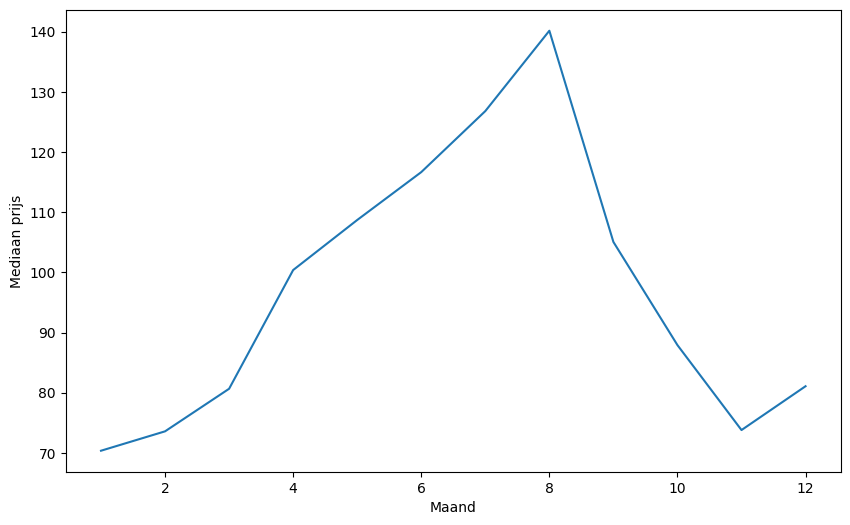

In [546]:
import matplotlib.pyplot as plt

mean_adr_per_month = data.groupby("arrival_date_month")['adr'].mean().tolist()
c_keys = data.groupby("arrival_date_month")
columns = list(c_keys.groups)

plt.figure(figsize = (10,6))
plt.plot(columns, mean_adr_per_month)
plt.xlabel("Maand")
plt.ylabel("Mediaan prijs")

<Axes: xlabel='arrival_date_month', ylabel='adr'>

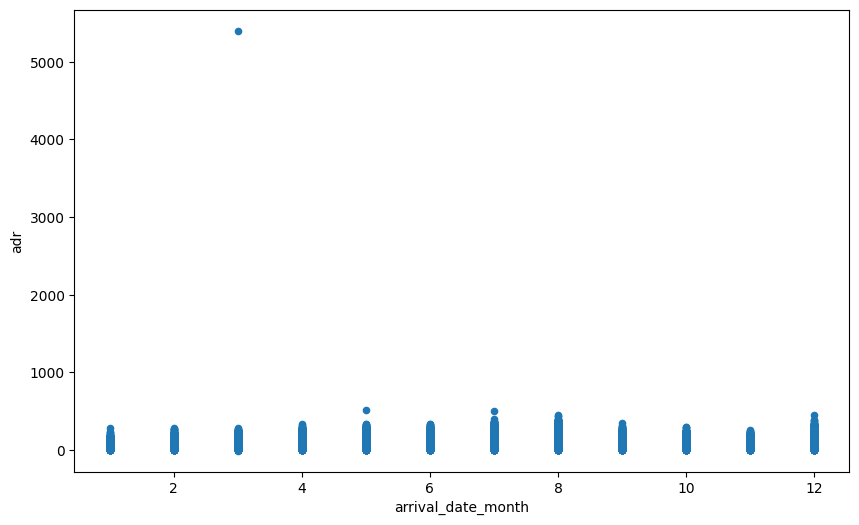

In [547]:
data.plot.scatter(x = "arrival_date_month", y = "adr", figsize = (10,6))

In [548]:
data['adr'].max()

5400.0

###Outliers verwijderen

In [549]:
data.drop(data['adr'].idxmax(), inplace = True)

##Label en features opsplitsen

In [555]:
X = data[['adr']]
y = data.drop(['adr'],axis=1)

X

,adr
0,0.00
1,0.00
2,75.00
3,75.00
4,98.00
...,...
119385,96.14
119386,225.43
119387,157.71
119388,104.40


In [556]:
Xtrain, Xrest, ytrain, yrest = train_test_split(X, y, test_size=0.2)
Xval, Xtest, yval, ytest = train_test_split(Xrest, yrest, test_size=0.5)

In [557]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(Xtrain, ytrain)

lr.score(Xtrain, ytrain)

0.034525064823705195

###Feature importance

['hotel', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'meal', 'market_segment', 'distribution_channel', 'reserved_room_type', 'total_of_special_requests']
[0.0009925024016886348, 0.006629302023513437, 0.005273164437485384, 0.02214001865716721, 0.005456289614954832, 0.001101234873330839, 0.0027126339159176853, 0.0029142769891244607, 0.002810347922126882, 0.0013821820623239442, 0.00649419003519022, 0.0018581054859393255, 0.014437634296094104, 0.002967706803295319]


Text(0, 0.5, 'Features')

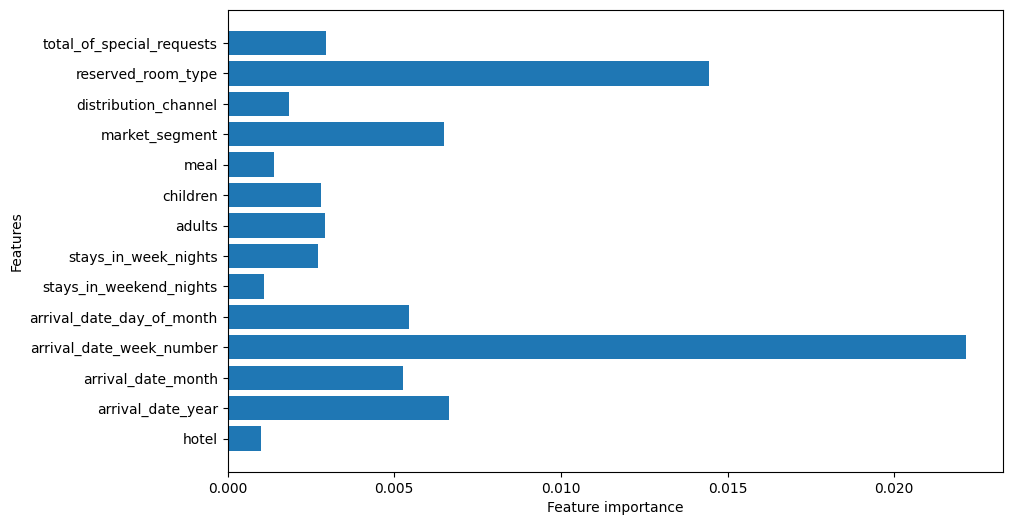

In [558]:
import matplotlib.pyplot as plt

columns = ytrain.columns.values.tolist()
print(columns)
coefs = lr.coef_.ravel().tolist()
print(coefs)

plt.figure(figsize = (10,6))
plt.barh(columns, coefs)
plt.xlabel("Feature importance")
plt.ylabel("Features")

###Ongewenste features verwijderen

In [554]:
 data.drop(["lead_time", "reservation_status", "customer_type", "deposit_type", "previous_bookings_not_canceled", "previous_cancellations", "is_repeated_guest", "babies", "booking_changes", "is_canceled", "hotel", "stays_in_"], axis=1, inplace = True)